## Pandas

In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!ls ../resources/data/

In [ ]:
!head -3 ../resources/data/Open_Data_RDW__Gekentekende_voertuigen.csv

In [2]:
rdw = pd.read_csv('../resources/data/Open_Data_RDW__Gekentekende_voertuigen.csv')
rdw.sample(5)

,Unnamed: 0,Kenteken,Voertuigsoort,Merk,Handelsbenaming,Datum tenaamstelling,Bruto BPM,Cilinderinhoud,Massa ledig voertuig,Toegestane maximum massa voertuig,Datum eerste toelating,Datum eerste afgifte Nederland,Catalogusprijs,WAM verzekerd
59342,2599919,15KPR3,Personenauto,CITROEN,C4 PICASSO,26/01/2012,6123.0,1598.0,1433.0,2015.0,22/01/2010,22/01/2010,28913.0,Ja
18715,819802,19XLP3,Personenauto,ALFA ROMEO,ALFA MITO,23/03/2016,NaN,1248.0,1125.0,1630.0,29/06/2012,29/06/2012,22622.0,Ja
5618,1386185,86NRF4,Personenauto,TOYOTA,TOYOTA PRIUS,16/05/2014,NaN,1798.0,1345.0,1805.0,30/10/2010,30/10/2010,26740.0,Nee
87678,2229473,DH2034,Personenauto,MG,MIDGET,20/07/1992,NaN,NaN,720.0,NaN,30/06/1962,20/07/1992,NaN,Ja
22856,3153591,31PSNF,Personenauto,SEAT,AROSA; 1.4 AUD 44 KW,05/03/2016,2124.0,1390.0,874.0,1400.0,30/10/2004,30/10/2004,NaN,Ja


In [ ]:
rdw.dtypes

(0, 4000)

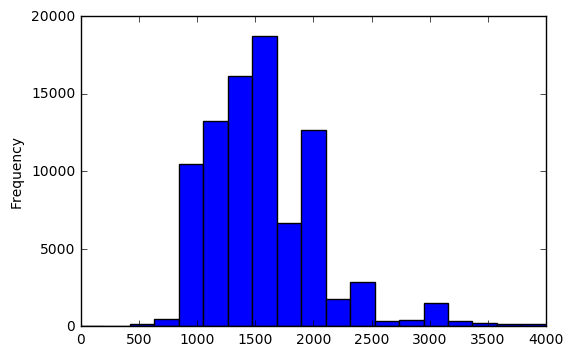

In [3]:
rdw["Cilinderinhoud"].plot.hist(bins=np.linspace(0, 4000, 20))
plt.xlim((0, 4000))

In [39]:
# sns is very useful in itself, but it also makes our plots look a bit better

import seaborn as sns
sns.set_style('whitegrid')

(0, 4000)

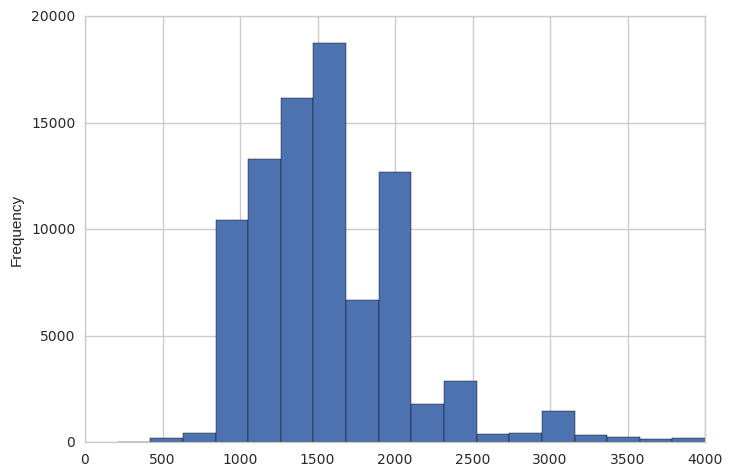

In [38]:
rdw["Cilinderinhoud"].plot.hist(bins=np.linspace(0, 4000, 20))
plt.xlim((0, 4000))

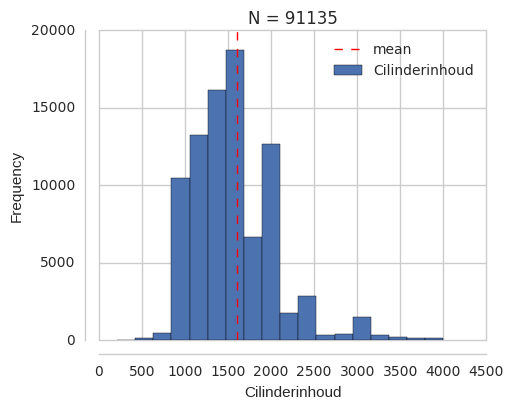

In [40]:
rdw["Cilinderinhoud"].plot.hist(bins=np.linspace(0, 4000, 20), figsize=(5, 4))

plt.xlabel("Cilinderinhoud")
plt.title("N = {}".format(rdw.shape[0]))
plt.axvline(rdw.Cilinderinhoud.mean(), ls='--', color='r', label='mean', lw=1)

sns.despine(offset=10)
plt.legend();

In [ ]:
import pymc3 as pm
from scipy import stats

log_cil = np.log(rdw.Cilinderinhoud)

with pm.Model():
    
    mu = pm.Normal('mu', 10, 10)
    sd = pm.HalfNormal('sd', 10)
    
    obs = pm.Normal('obs', mu, sd, observed=log_cil)
    
    samples = pm.sample(500)[:100]

(7.4325753984317089, 0.66213446375784824)

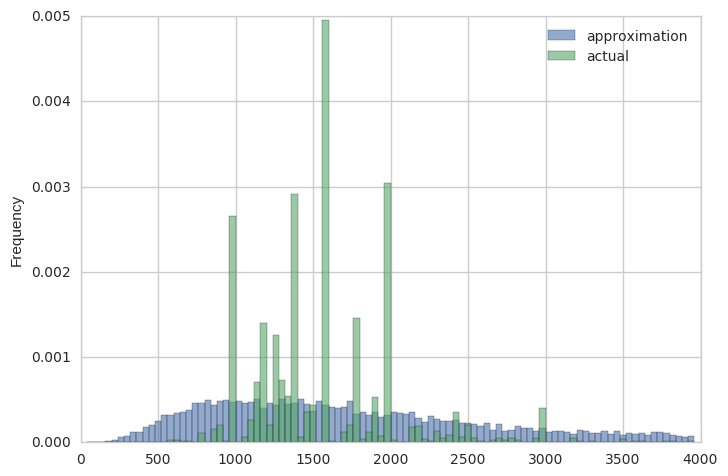

In [78]:
y = np.exp(stats.norm(samples['mu'].mean(), samples['sd'].mean()).rvs(10000))

plt.hist(y, bins=np.arange(0, 4000, 40), alpha=.6, normed=True, label='approximation')
rdw["Cilinderinhoud"].plot.hist(bins=np.arange(0, 4000, 40), normed=True, alpha=.6, label='actual')

plt.legend()

samples['mu'].mean(), samples['sd'].mean()

In [44]:
x

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

## Pandas

* The main datatypes in `pandas` are `Series` and `DataFrame`
* A `Series` is a column (or row)
* A `DataFrame` is a table

In [ ]:
## simple creation of series

In [ ]:
## create a dataframe from series

In [ ]:
## the index

In [ ]:
## selecting records using `loc`

In [ ]:
## plotting series

In [ ]:
## plotting a frame: scatter and lineplots

In [ ]:
## groupby

In [ ]:
## means, sizes and sums

## RDW dataset

* All registered cars in the Netherlands
    * [description]( https://www.rdw.nl/SiteCollectionDocuments/Over%20RDW/Naslagwerk/Beschrijving%20dataset%20Voertuigen%20v2.0.pdf)
* 858 Megabytes on disk as a `.csv` file

In [ ]:
## read the dataset

rdw_full = pd.read_csv('/home/gijs/Documents/datasets/Personenauto_basisdata.csv')

In [ ]:
rdw_full.shape

In [ ]:
## show top 10

rdw_full.Merk.value_counts()[:10]

In [ ]:
rdw_sample = rdw_full.sample(frac=.01)
rdw_sample.shape

In [ ]:
rdw_sample.to_csv('../resources/data/Open_Data_RDW__Gekentekende_voertuigen.csv')

In [ ]:
del rdw_full

In [ ]:
!ls -lha /home/gijs/Downloads/Personenauto_basisdata.csv

In [ ]:
rdw = pd.read_csv('../resources/data/Open_Data_RDW__Gekentekende_voertuigen.csv')

In [ ]:
rdw

(236,)

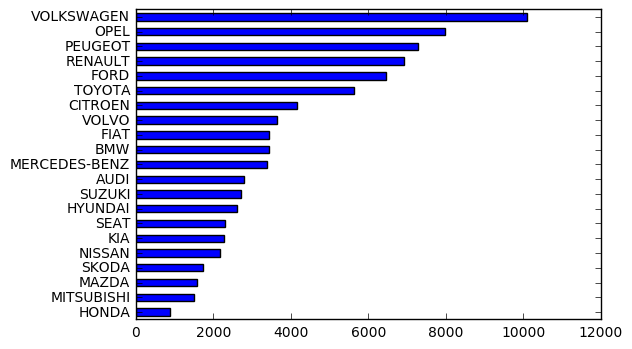

In [5]:
counts = rdw.Merk.value_counts()

counts[20::-1].plot(kind='barh')

counts.shape

In [6]:
## sorting

In [7]:
## parse dates

In [ ]:
## 

In [ ]:
rdw.shape

In [ ]:
rdw.dtypes

In [ ]:
rdw.info()

In [ ]:
eerste_toelating = pd.to_datetime(rdw_sample["Datum eerste toelating"])

In [ ]:
pd.cut(eerste_toelating.dt.year, bins=np.arange(1900, 2021, 10)).value_counts().sort_index().plot(kind='barh')